# PENENTUAN KELAYAKAN KREDIT MOBIL MENGGUNAKAN METODE FUZZY MAMDANI STUDI KASUS TEKNIK INFORMATIKA SERANG RAYA

- __NAMA  : LISA MELINDA__
- __NIM   : 09011381722088__
- __KELAS : SK5B__
- __MK    : KECERDASAN BUATAN__

# Fuzzifikasi 

Inputan terdiri dari tiga variabel yaitu pekerjaan, penghasilan dan anggota keluarga, dimana setiap variabel akan disusun domain himpunan fuzzy berdasarkan domain tersebut, selanjutnya ditentukan fungsi keanggotaan dari masing-masing variabel.
    Untuk variabel input pekerjaan memiliki tiga kriteria fuzzy Rendah(0 - 25), sedang(15 - 40) dan tinggi(25 - 40). variabel input penghasilan memiliki tiga kriteria fuzzy rendah(0-25), sedang(15-40) dan banyak(25-40). Sedangkan untuk c
    Untuk variabel output nilai kelayakan memiliki tiga kriteria fuzzy tolak(0-70) dan terima (50-70)

 Contoh perhitungan:
    
    Pekerjaan  = 38     #sedang dan tinggi
    Penghasilan  = 36   #sedang dan tinggi
    Anggota Keluarga = 16   #Sedang dan tinggi
    
    keadaan fuzzifikasi yang akan dihitung hanya pada range yang memenuhi kriteria nilai inputan: 
    fungsi keanggotan fuzzy pada saat pekerjaan tinggi dan sedang:
        sedang = (40 - 38)/(40 - 25) = 2/15 = 0,14
        tinggi = (38 - 25)/(40 - 25) = 13/15 = 0,86
    fungsi keanggotaan fuzzy pada penghasilan tinggi dan sedang:
        sedang = (40 - 36)/(40-25) = 4/15 = 0,27
        tinggi = (36-25)/(40-25) = 11/15 = 0,73
    fungsi keanggotaan fuzzy Anggota Keluarga tinggi dan sedang:
        sedang = (20-16)/(20-14) = 4/6 = 0,66
        tinggi = (16-14)/(20-14) = 2/6 = 0,33

In [7]:
#memanggil library yang akan kita gunakan
#skfuzzy adalah library fuzzy logic pada python yang bekerja dengan numpy array
import numpy as np #import numpy gunkan np untuk menggunakan library ini
import skfuzzy as fuzz #import library fuzzy gunakan fuzz untuk menggunkaan library ini
from skfuzzy import control as ctrl #panggil library control dari skfuzzy gunakan ctrl untuk menggunakan library ini

In [8]:
PK = ctrl.Antecedent(np.arange(0,51, 1), 'Pekerjaan') #variabel PK,PL,dan AK . Antecedent adalah library untuk 'Input'
PL = ctrl.Antecedent(np.arange(0,51, 1), 'Penghasilan') 
AK = ctrl.Antecedent(np.arange(0,31, 1), 'Anggota Keluarga')
NK = ctrl.Consequent(np.arange(0, 101 , 1), 'Nilai Kelayakan') #variabel NK dg nilai 0 samapai 101 dengan range 1,Consequent adalah library untuk 'Output'

Variabel Pekerjaan yang diwakilkan PK

$PK [Rendah] = 
\left\{
    \begin{array}{ll}
        0 & \mbox{; } x \geq 25 \\
       {15-x \over 10} & \mbox {; } 15 < x < 25\\
       1 & \mbox{; } x \leq 15\\
    \end{array}
\right.$

$PK [Sedang] = 
\left\{
    \begin{array}{ll}
        0 & \mbox{; } x \leq 15 \\
       {x-15 \over 15} & \mbox{; } 15 < x < 25 \\
       {40-x \over 15}& \mbox{; } 25 < x < 40
    \end{array}
\right.$

$PK [Tinggi] = 
\left\{
    \begin{array}{ll}
      0 & \mbox{; } x \leq 25\\
      {25-x \over 15} & \mbox{; } 25 < x < 40\\
      1 & \mbox{; } x\geq 40 \\
    \end{array}
\right.$

Variabel Penghasilan yang diwakilkan PL

$PL [Rendah] =
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 25 \\
       {15-x \over 10} & \mbox {; } 15 < x < 25\\
       1 & \mbox{; } x \leq 15
    \end{array}
\right.$

$PL [Sedang] = 
\left\{
    \begin{array}{ll}
        0 & \mbox{; } x \leq 15 \\
       {x-15 \over 15} & \mbox{; } 15 < x < 25 \\
       {40-x \over 15}& \mbox{; } 25 < x < 40
    \end{array}
\right.$

$PL [Tinggi] = 
\left\{
    \begin{array}{ll}
      0 & \mbox{; } x \leq 25\\
      {25-x \over 15} & \mbox{; } 25 < x < 40\\
      1 & \mbox{; } x\geq 40 \\
    \end{array}
\right.$

Variabel Anggota Keluarga yang diwakilkan AK

$AK [Rendah] = 
\left\{
    \begin{array}{ll}
        0 & \mbox{; } x \geq 14 \\
       {8-x \over 6} & \mbox{; } 8 < x < 14\\
       1 & \mbox{; } x \leq 8
    \end{array}
\right.$

$AK [Sedang] = 
\left\{
    \begin{array}{ll}
      0 & \mbox {; } x \leq 8\\
      {x-8 \over 6} & \mbox{; } 8 < x < 14\\
      {20-x \over 6} & \mbox {; } 14 < x < 20
    \end{array}
\right.$

$AK [Tinggi] = 
\left\{
    \begin{array}{ll}
      0 & \mbox {; } x \leq 14\\
      {14-x \over 6} & \mbox{; } 14 < x < 20\\
      1 & \mbox {; } x \geq 20
    \end{array}
\right.$

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


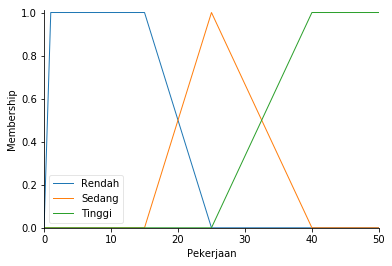

In [9]:
PK['Rendah'] = fuzz.trapmf(PK.universe, [1, 1, 15, 25]) #membership function Rendah, dalam bentuk trapesium dengan nilai 1 - 25
PK['Sedang'] = fuzz.trimf(PK.universe, [15, 25, 40])#membership function Sedang, dalam bentuk segitiga dengan nilai 15 - 40
PK['Tinggi'] = fuzz.trapmf(PK.universe, [25, 40, 50, 50])#membership function Tinggi, dalam bentuk trapesium dengan nilai 25 - 50

PK.view() #mencetak membership function Penghasilan dalam satu grafik

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


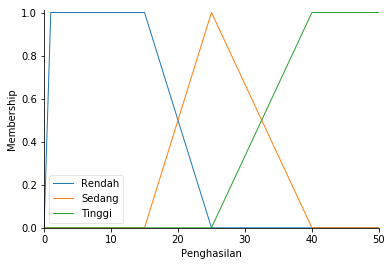

In [10]:
PL['Rendah'] = fuzz.trapmf(PL.universe, [1, 1, 15, 25]) #membership function Rendah, dalam bentuk trapesium dengan nilai 1 - 25
PL['Sedang'] = fuzz.trimf(PL.universe, [15, 25, 40])#membership function Sedang, dalam bentuk segitiga dengan nilai 15 - 40
PL['Tinggi'] = fuzz.trapmf(PL.universe, [25, 40, 50, 50])#membership function Tinggi, dalam bentuk trapesium dengan nilai 25 - 50

PL.view() #mencetak membership function Penghasilan dalam satu grafik

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


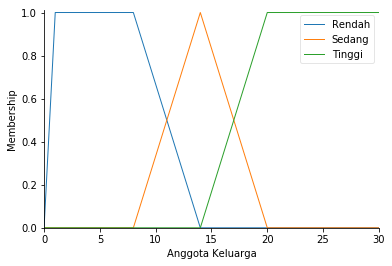

In [11]:
AK['Rendah'] = fuzz.trapmf(AK.universe, [1, 1, 8, 14]) #membership function Rendah, dalam bentuk trapesium dengan nilai 1 - 14
AK['Sedang'] = fuzz.trimf(AK.universe, [8, 14, 20]) #membership function Sedang, dalam bentuk segitiga dengan nilai 8 - 20
AK['Tinggi'] = fuzz.trapmf(AK.universe, [14, 20, 30, 30])#membership function Tinggi, dalam bentuk trapesium dengan nilai 14 - 30

AK.view() #mencetak membership function Anggota Keluarga dalam satu grafik

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


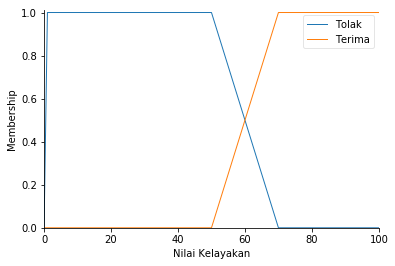

In [12]:
NK['Tolak'] = fuzz.trapmf(NK.universe, [1, 1, 50, 70]) #membership function Tolak, dalam bentuk trapesium dengan nilai 1 - 70
NK['Terima'] = fuzz.trapmf(NK.universe, [50, 70, 100, 100]) #membership function Terima, dalam bentuk trapesium dengan nilai 50 - 100

NK.view() #mencetak membership function Nilai Kelayakan dalam satu grafik

# Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2105893d780>)

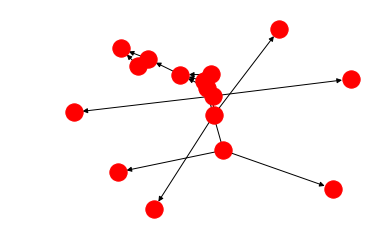

In [13]:
#membuat aturan untuk menentukan pengajuan kredit
#karena input ada 3 dan setiap input mempunyai tiga kondisi maka saya membuat 27 aturan atau 3^3
rule1 = ctrl.Rule(PK['Rendah'] & PL ['Rendah'] & AK['Rendah'], NK['Tolak'])
rule1.view() #mencetak gambar aturan

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x21058873128>)

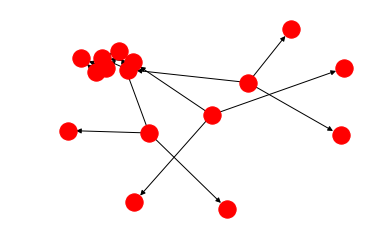

In [14]:
rule2 = ctrl.Rule(PK['Rendah'] & PL['Rendah'] & AK['Sedang'], NK['Tolak'])
rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x21058810860>)

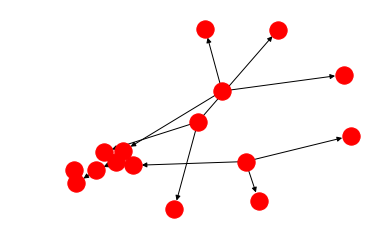

In [15]:
rule3 = ctrl.Rule(PK['Rendah'] & PL['Rendah'] & AK['Tinggi'], NK['Tolak'])
rule3.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x210584a5080>)

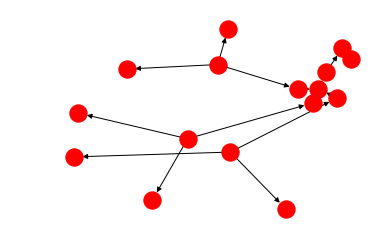

In [16]:
rule4 = ctrl.Rule(PK['Sedang'] & PL['Rendah'] & AK['Rendah'], NK['Tolak'])
rule4.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2105852cac8>)

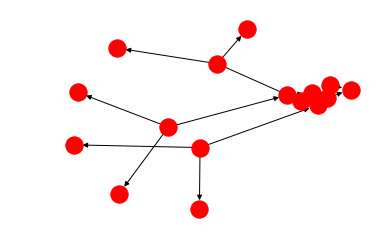

In [17]:
rule5 = ctrl.Rule(PK['Sedang'] & PL['Rendah'] & AK['Sedang'], NK['Tolak'])
rule5.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x210587b12e8>)

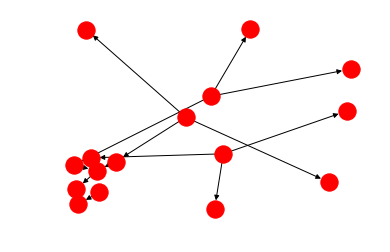

In [18]:
rule6 = ctrl.Rule(PK['Sedang'] & PL['Rendah'] & AK['Tinggi'], NK['Tolak'])
rule6.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x210599659e8>)

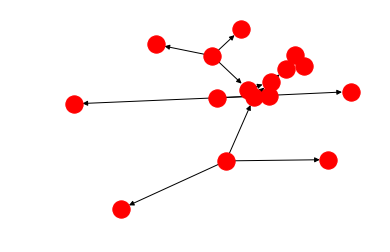

In [19]:
rule7 = ctrl.Rule(PK['Tinggi'] & PL['Rendah'] & AK['Rendah'], NK['Tolak'])
rule7.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x210599d1dd8>)

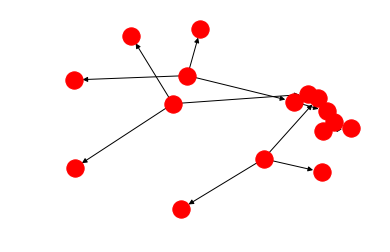

In [20]:
rule8 = ctrl.Rule(PK['Tinggi'] & PL['Rendah'] & AK['Sedang'], NK['Tolak'])
rule8.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x21059a4b550>)

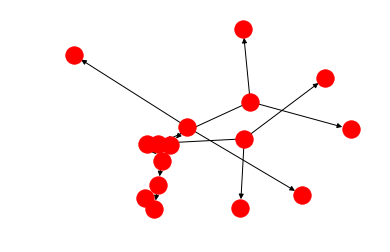

In [21]:
rule9 = ctrl.Rule(PK['Tinggi'] & PL['Rendah'] & AK['Tinggi'], NK['Tolak'])
rule9.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x21059ac20f0>)

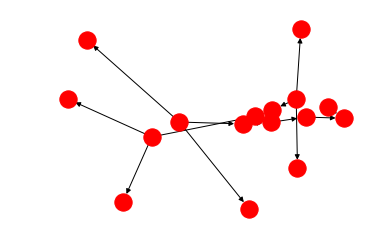

In [22]:
rule10 = ctrl.Rule(PK['Rendah'] & PL['Sedang'] & AK['Rendah'], NK['Tolak'])
rule10.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x21059b2eba8>)

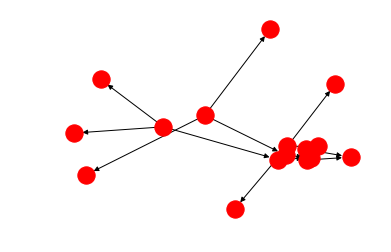

In [23]:
rule11 = ctrl.Rule(PK['Rendah'] & PL['Sedang'] & AK['Sedang'], NK['Terima'])
rule11.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x21059ba93c8>)

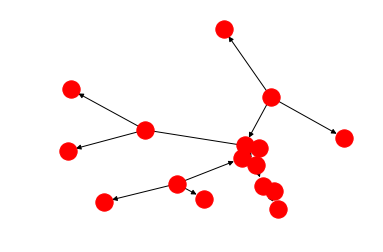

In [24]:
rule12 = ctrl.Rule(PK['Rendah'] & PL['Sedang'] & AK['Tinggi'], NK['Terima'])
rule12.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x21059c1c128>)

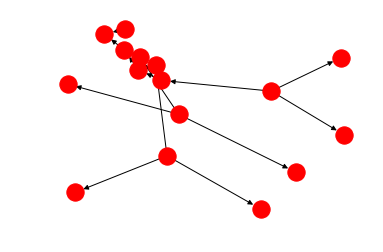

In [25]:
rule13 = ctrl.Rule(PK['Sedang'] & PL['Sedang'] & AK['Rendah'],NK ['Tolak'])
rule13.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x21059c887f0>)

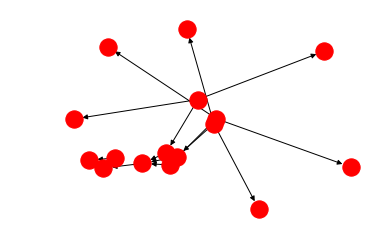

In [26]:
rule14 = ctrl.Rule(PK['Sedang'] & PL['Sedang'] & AK['Sedang'], NK['Terima'])
rule14.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x21059cf7f98>)

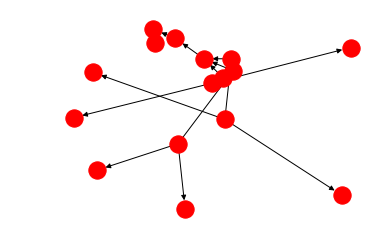

In [27]:
rule15 = ctrl.Rule(PK['Sedang'] & PL['Sedang'] & AK['Tinggi'], NK['Terima'])
rule15.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x21059d74630>)

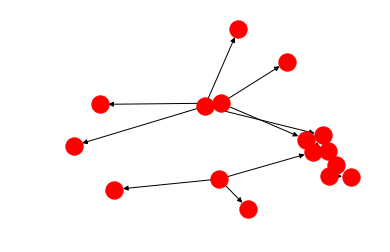

In [28]:
rule16 = ctrl.Rule(PK['Tinggi'] & PL['Sedang'] & AK['Rendah'], NK['Tolak'])
rule16.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2105adb0b00>)

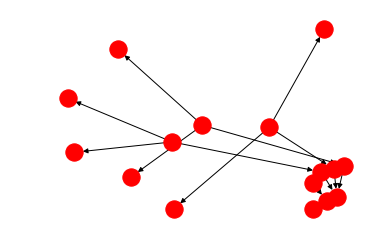

In [29]:
rule17 = ctrl.Rule(PK['Tinggi'] & PL['Sedang'] & AK['Sedang'], NK['Terima'])
rule17.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2105ade0358>)

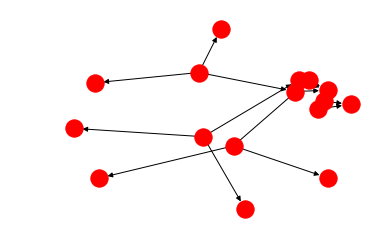

In [30]:
rule18 = ctrl.Rule(PK['Tinggi'] & PL['Sedang'] & AK['Tinggi'], NK['Terima'])
rule18.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2105ae954e0>)

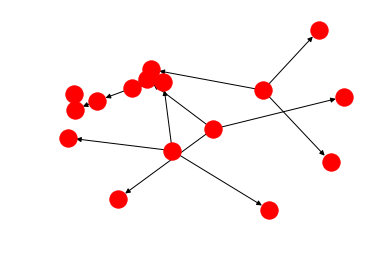

In [31]:
rule19 = ctrl.Rule(PK['Rendah'] & PL['Tinggi'] & AK['Rendah'], NK['Tolak'])
rule19.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2105af02ba8>)

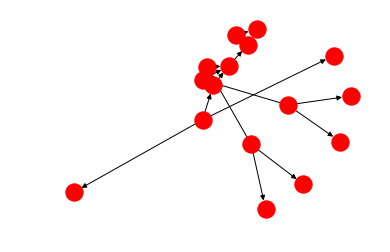

In [32]:
rule20 = ctrl.Rule(PK['Rendah'] & PL['Tinggi'] & AK['Sedang'], NK['Terima'])
rule20.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2105af790b8>)

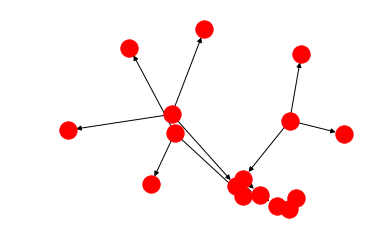

In [33]:
rule21 = ctrl.Rule(PK['Rendah'] & PL['Tinggi'] & AK['Tinggi'], NK['Terima'])
rule21.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2105afe3b38>)

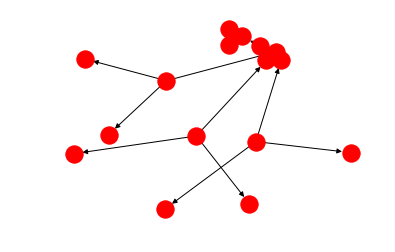

In [34]:
rule22 = ctrl.Rule(PK['Sedang'] & PL['Tinggi'] & AK['Rendah'], NK['Tolak'])
rule22.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2105b05c5f8>)

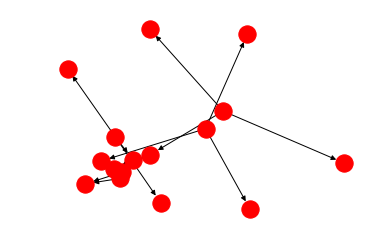

In [35]:
rule23 = ctrl.Rule(PK['Sedang'] & PL['Tinggi'] & AK['Sedang'], NK['Terima'])
rule23.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2105b0caf60>)

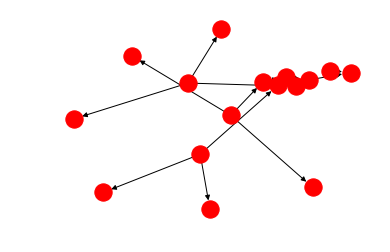

In [36]:
rule24 = ctrl.Rule(PK['Sedang'] & PL['Tinggi'] & AK['Tinggi'], NK['Terima'])
rule24.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2105b144668>)

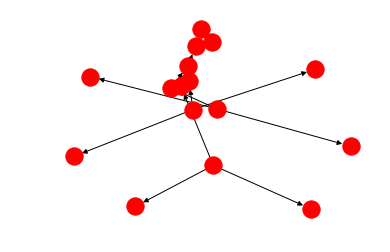

In [37]:
rule25 = ctrl.Rule(PK['Tinggi'] & PL['Tinggi'] & AK['Rendah'], NK['Tolak'])
rule25.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2105b1af358>)

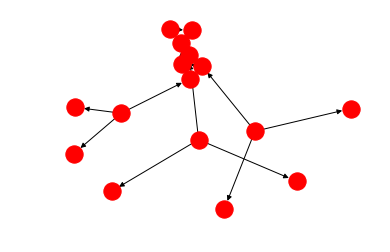

In [38]:
rule26 = ctrl.Rule(PK['Tinggi'] & PL['Tinggi'] & AK['Sedang'], NK['Terima'])
rule26.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2105b221898>)

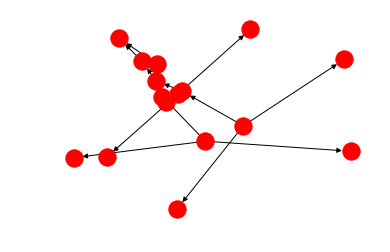

In [39]:
rule27 = ctrl.Rule(PK['Tinggi'] & PL['Tinggi'] & AK['Tinggi'], NK['Terima'])
rule27.view()

Sumber : PENENTUAN KELAYAKAN KREDIT MOBIL MENGGUNAKAN METODE FUZZY MAMDANI

# Fuzzy Inference

Setelah aturan dibentuk maka dilakukan pada inferensi memproses aplikasi fungsi implikasi. Pada metode mamdani, fungsi implikasi yang digunakan adalan MAX (Maksimum), yang berarti tingkat kenggotaan yang didapat sebagai konsekuen dari proses ini adalah nilai maksimum dari variabel pekerjaan, penghasilan dan anggota keluarga, sehingga didapat daerah fuzzy pada variabel untuk masing-masing aturan. Interferensi adalah proses penggabungan banyak aturan berdasarkan data yang tersedia,aturan tersebut dinyatakan IF.THEN. 

1. IF Pekerjaan Rendah AND Penghasilan Rendah AND Anggota Keluarga Rendah THEN kredit Tolak
2. IF Pekerjaan Rendah AND Penghasilan Rendah AND Anggota Keluarga Sedang THEN kredit Tolak
3. IF Pekerjaan Rendah AND Penghasilan Rendah AND Anggota Keluarga Tinggi THEN kredit Tolak
4. IF Pekerjaan Sedang AND Penghasilan Rendah AND Anggota Keluarga Rendah THEN kredit Tolak
5. IF Pekerjaan Sedang AND Penghasilan Rendah AND Anggota Keluarga Sedang THEN kredit Tolak
6. IF Pekerjaan Sedang AND Penghasilan Rendah AND Anggota Keluarga Tinggi THEN kredit Tolak
7. IF Pekerjaan Tinggi AND Penghasilan Rendah AND Anggota Keluarga Rendah THEN kredit Tolak
8. IF Pekerjaan Tinggi AND Penghasilan Rendah AND Anggota Keluarga Sedang THEN kredit Tolak
9. IF Pekerjaan Tinggi AND Penghasilan Rendah AND Anggota Keluarga Tinggi THEN kredit Tolak
10. IF Pekerjaan Rendah AND Penghasilan Sedang AND Anggota Keluarga Rendah THEN kredit Tolak
11. IF Pekerjaan Rendah AND Penghasilan Sedang AND Anggota Keluarga Sedang THEN kredit Terima
12. IF Pekerjaan Rendah AND Penghasilan Sedang AND Anggota Keluarga Tinggi THEN kredit Terima
13. IF Pekerjaan Sedang AND Penghasilan Sedang AND Anggota Keluarga Rendah THEN kredit Tolak
14. IF Pekerjaan Sedang AND Penghasilan Sedang AND Anggota Keluarga Sedang THEN kredit Terima
15. IF Pekerjaan Sedang AND Penghasilan Sedang AND Anggota Keluarga Tinggi THEN kredit Terima
16. IF Pekerjaan Tinggi AND Penghasilan Sedang AND Anggota Keluarga Rendah THEN kredit Tolak
17. IF Pekerjaan Tinggi AND Penghasilan Sedang AND Anggota Keluarga Sedang THEN kredit Terima
18. IF Pekerjaan Tinggi AND Penghasilan Sedang AND Anggota Keluarga Tinggi THEN kredit Terima
19. IF Pekerjaan Rendah AND Penghasilan Tinggi AND Anggota Keluarga Rendah THEN kredit Tolak
20. IF Pekerjaan Rendah AND Penghasilan Tinggi AND Anggota Keluarga Sedang THEN kredit Terima
21. IF Pekerjaan Rendah AND Penghasilan Tinggi AND Anggota Keluarga Tinggi THEN kredit Terima
22. IF Pekerjaan Sedang AND Penghasilan Tinggi AND Anggota Keluarga Rendah THEN kredit Tolak
23. IF Pekerjaan Sedang AND Penghasilan Tinggi AND Anggota Keluarga Sedang THEN kredit Terima
24. IF Pekerjaan Sedang AND Penghasilan Tinggi AND Anggota Keluarga Tinggi THEN kredit Terima
25. IF Pekerjaan Tinggi AND Penghasilan Tinggi AND Anggota Keluarga Rendah THEN kredit Tolak
26. IF Pekerjaan Tinggi AND Penghasilan Tinggi AND Anggota Keluarga Sedang THEN kredit Terima
27. IF Pekerjaan Tinggi AND Penghasilan Tinggi AND Anggota Keluarga Tinggi THEN kredit Terima

In [40]:
#membuat kontrol sistem yang kondisi nya diambil berdasarkan aturan/rule yang telah dibuat
nilai_kelayakan1 = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, 
                                rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18,
                                rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27,])

In [41]:
#membuat simulasi kontrol sistem yang kondisinya di ambil berdasarkan nilai_kelayakan1/sistem kontrol yg telah kita buat
nilai_kelayakan = ctrl.ControlSystemSimulation(nilai_kelayakan1)

# Defuzzifikasi

Pada metode mamdani, metode defuzzifikasi dapat dipilih salah satu dari metode defuzzifikasi. Perhitungan Fuzzy dilakukan untuk menentukan hasil penilaian pengajuan sebuah kredit yang penilaian dilakukan oleh kepala cabang.

In [46]:
#membuat interupsi yang meminta inputan dari keyboard
nilaiAK = input('Anggota Keluarga :') #membuat inputan untuk nilai Anggota Keluarga            
nilaiPK = input('Pekerjaan: ') #membuat inputan untuk nilai Pekerjaan
nilaiPL = input('Penghasilan: ') #membuat inputan untuk nilai Penghasilan

Anggota Keluarga :16
Pekerjaan: 38
Penghasilan: 36


In [47]:
nilai_kelayakan.input['Anggota Keluarga'] = float(nilaiAK) #merubah format data nilai anggota keluarga menjadi float, dan memasukkannya kedalam kontrol sistem berdasarkan kondisi yang telah dibuat
nilai_kelayakan.input['Pekerjaan'] = float(nilaiPK) #merubah format data pekerjaan menjadi float, dan memasukkannya kedalam kontrol sistem berdasarkan kondisi yang telah dibuat
nilai_kelayakan.input['Penghasilan'] = float(nilaiPL) #merubah format data penghasilan menjadi float, dan memasukkannya kedalam kontrol sistem berdasarkan kondisi yang telah dibuat

nilai_kelayakan.compute() #menghitung jumlahnya

78.16239316239312


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


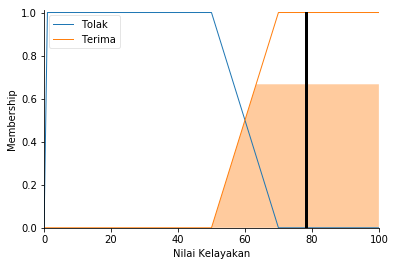

In [48]:
print(nilai_kelayakan.output['Nilai Kelayakan']) #mencetak output nilai kelayakan berdasarkan kondisi yg telah di penuhi
NK.view(sim=nilai_kelayakan)#membuat plot/grafik dari nilai kelayakan dengan kondisi berada pada nilai_kelayakan yang telah terpenuhi

$$z=\frac{\alpha pred_1 * z_1 + \alpha pred_2 * z_2 + ... + \alpha pred_n * z_n}{\alpha pred_1 + \alpha pred_2 + ... + \alpha pred_n}$$

a-pred_n= keadaan pada saat rule_n
z_n = keadaan pada saat rule terjadi

In [45]:
#mentukan predikat dan z menggunakan rumus fuzzy logic sesuai pada saat keadaan yang terpenuhi
#Pekerjaan = 38
#Penghasilan = 36
#Anggota Keluarga = 16

$$z=\frac{0,14 * (50 + 52.5+55+57.5+60+62.5+65+67.5+70) + 0.66*(75+85+95)}{0.14+0.14+0.14+0.14+0.14+0.14+0.14+0.14+0.14+0.66+0.66+0.66}$$

$$z= \frac{243.9}{3.24}$$

$$z= 75.27$$

sumber : http://e-jurnal.lppmunsera.org/index.php/ProTekInfo/article/view/22